In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier  # For classification
from sklearn.neighbors import KNeighborsRegressor   # For regression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf


In [3]:
ATM_sample = pd.read_csv('/Users/shakir/Desktop/ECON3203/Grp assignment/Datasets/ATM_sample.csv')
ATM_sample.info()
y_sample = ATM_sample['Withdraw']
x_sample = ATM_sample.drop(['Withdraw'],axis = 1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shops     22000 non-null  float64
 1   ATMs      22000 non-null  int64  
 2   Downtown  22000 non-null  int64  
 3   Weekday   22000 non-null  int64  
 4   Center    22000 non-null  int64  
 5   High      22000 non-null  int64  
 6   Withdraw  22000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


In [79]:
ATM_test = pd.read_csv('/Users/shakir/Desktop/ECON3203/Grp assignment/Datasets/ATM_test.csv')
ATM_test.info()
y_test = ATM_test['Withdraw']
x_test = ATM_test.drop(['Withdraw'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shops     150 non-null    float64
 1   ATMs      150 non-null    int64  
 2   Downtown  150 non-null    int64  
 3   Weekday   150 non-null    int64  
 4   Center    150 non-null    int64  
 5   High      150 non-null    int64  
 6   Withdraw  150 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 8.3 KB


# Get start with looking at the information of the data set.

In [80]:
ATM_sample.shape

(22000, 7)

In [81]:
# Display basic statistical information of the dataset
stats_info = ATM_sample.describe()
stats_info

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
count,22000.000000,22000.000000,22000.00000,22000.000000,22000.000000,22000.000000,22000.000000
mean,7.316373,7.937455,0.70200,0.714091,0.102455,0.301591,54.652818
std,4.118692,3.673415,0.45739,0.451857,0.303252,0.458959,25.099767
min,0.800000,0.000000,0.00000,0.000000,0.000000,0.000000,11.668197
25%,1.050000,4.000000,0.00000,0.000000,0.000000,0.000000,18.500386
50%,9.890000,9.000000,1.00000,1.000000,0.000000,0.000000,68.240749
75%,10.070000,11.000000,1.00000,1.000000,0.000000,1.000000,71.345778
max,10.830000,17.000000,1.00000,1.000000,1.000000,1.000000,103.964065


In [82]:
# Check for missing values in the dataset
missing_values = ATM_sample.isnull().sum()
missing_values

Shops       0
ATMs        0
Downtown    0
Weekday     0
Center      0
High        0
Withdraw    0
dtype: int64

In [83]:
missing_values = ATM_sample.isnull().sum()
ATM_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shops     22000 non-null  float64
 1   ATMs      22000 non-null  int64  
 2   Downtown  22000 non-null  int64  
 3   Weekday   22000 non-null  int64  
 4   Center    22000 non-null  int64  
 5   High      22000 non-null  int64  
 6   Withdraw  22000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


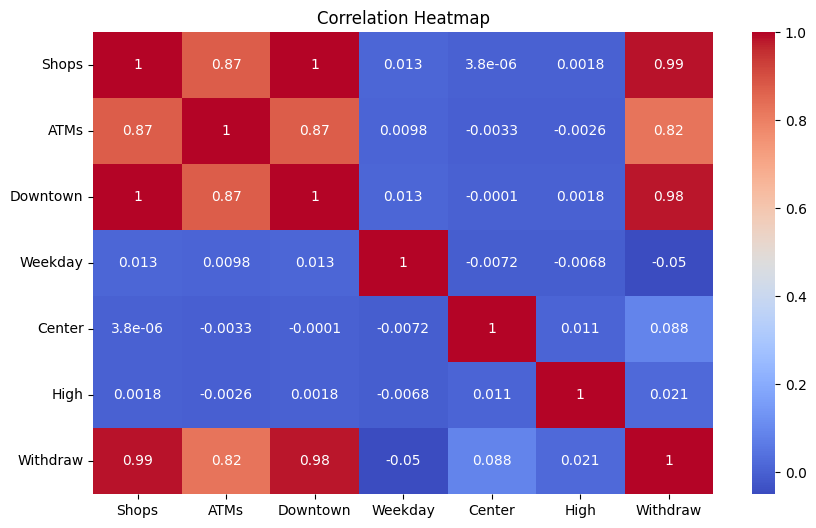

In [5]:
# Calculate the correlation matrix
correlation_matrix = ATM_sample.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('corr', dpi=1000)
plt.show()


In [85]:
ATM_sample.Withdraw.head()

0    72.750556
1    66.720482
2    19.189516
3    67.388669
4    15.813127
Name: Withdraw, dtype: float64

Text(0.5, 1.0, 'histogram of Withdraw')

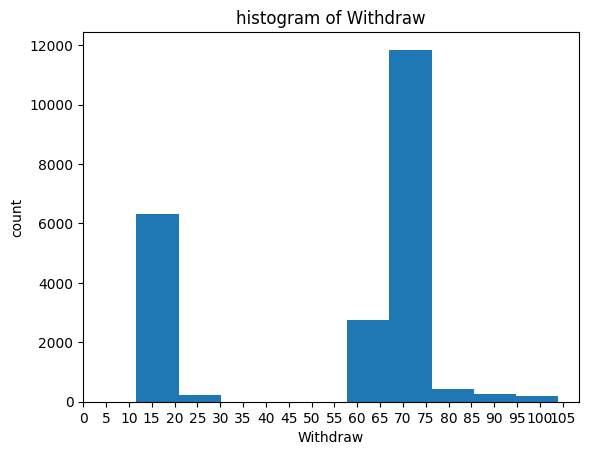

In [86]:
plt.hist("Withdraw", data = ATM_sample)
plt.xlabel("Withdraw")
plt.ylabel("count")
plt.xticks(range(0, 110, 5))
plt.title("histogram of Withdraw")

Text(0.5, 1.0, 'histogram of Withdraw')

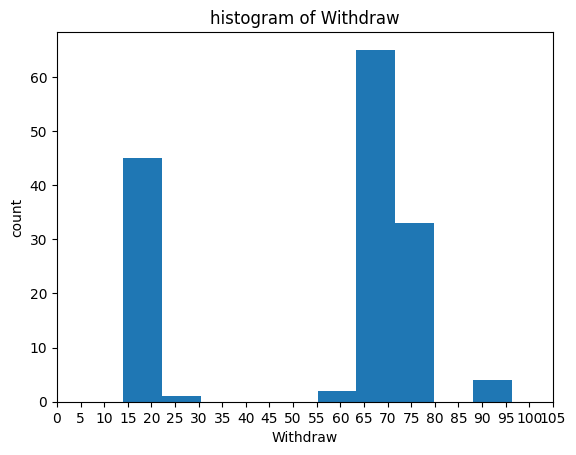

In [87]:
plt.hist("Withdraw", data = ATM_test)
plt.xlabel("Withdraw")
plt.ylabel("count")
plt.xticks(range(0, 110, 5))
plt.title("histogram of Withdraw")

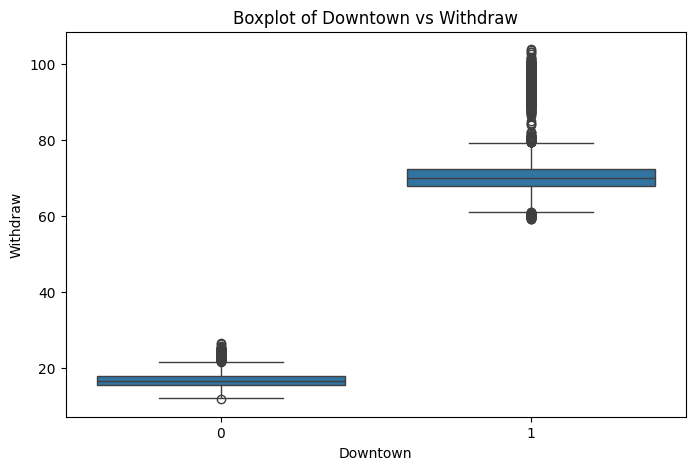

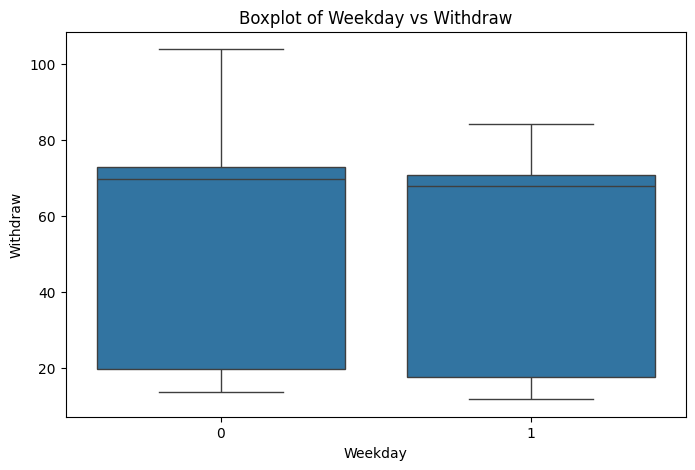

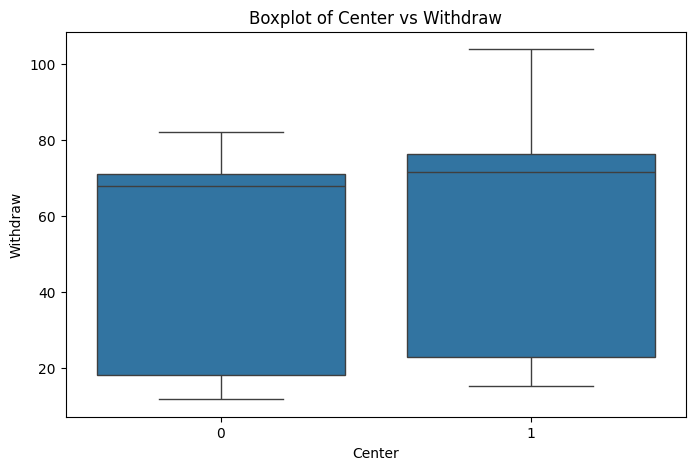

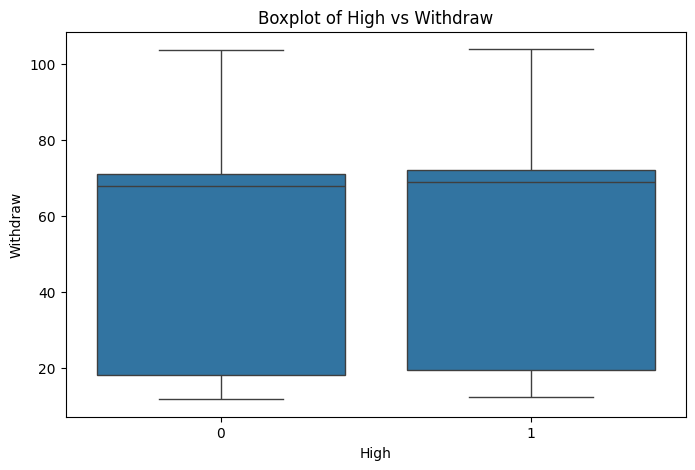

In [88]:
# Boxplots for categorical features against Withdraw
categorical_features = ['Downtown', 'Weekday', 'Center', 'High']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=feature, y='Withdraw', data=ATM_sample)
    plt.title(f'Boxplot of {feature} vs Withdraw')
    plt.show()


Text(0.5, 1.0, 'histogram of ATMs')

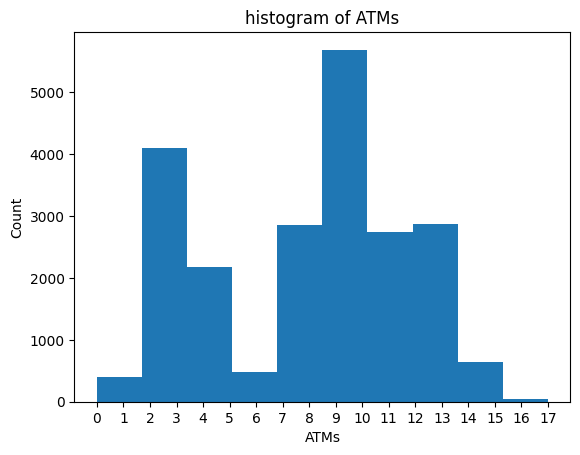

In [89]:
plt.hist('ATMs', data = ATM_sample)
plt.xlabel("ATMs")
plt.ylabel("Count")
plt.xticks(range(0, 18, 1))
plt.title("histogram of ATMs")

Text(0.5, 1.0, 'histogram of ATMs')

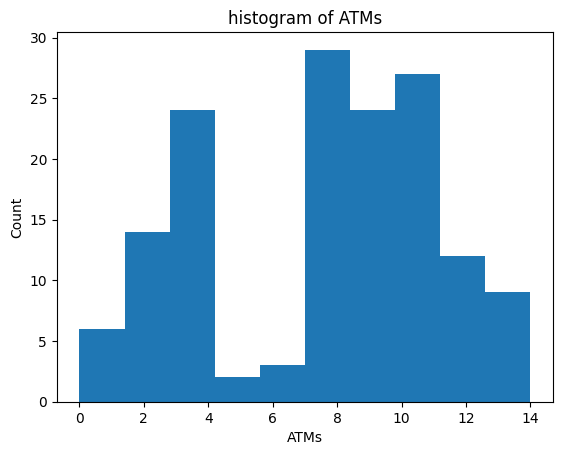

In [90]:
plt.hist('ATMs', data = ATM_test)
plt.xlabel("ATMs")
plt.ylabel("Count")
plt.title("histogram of ATMs")

Text(0.5, 1.0, 'histogram of Shops')

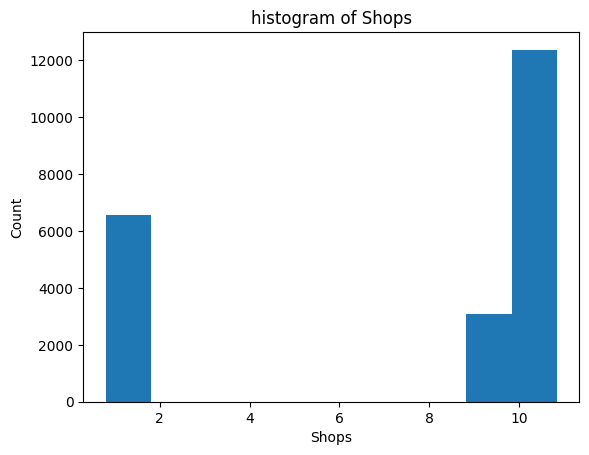

In [91]:
plt.hist('Shops', data = ATM_sample)
plt.xlabel("Shops")
plt.ylabel("Count")
plt.title("histogram of Shops")

Text(0.5, 1.0, 'histogram of Shops')

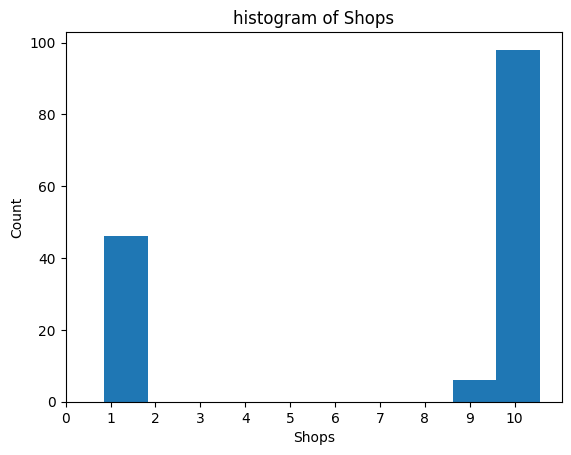

In [92]:
plt.hist('Shops', data = ATM_test)
plt.xlabel("Shops")
plt.ylabel("Count")
plt.xticks(range(0, 11, 1))
plt.title("histogram of Shops")

Text(0.5, 1.0, 'Count Plot for High')

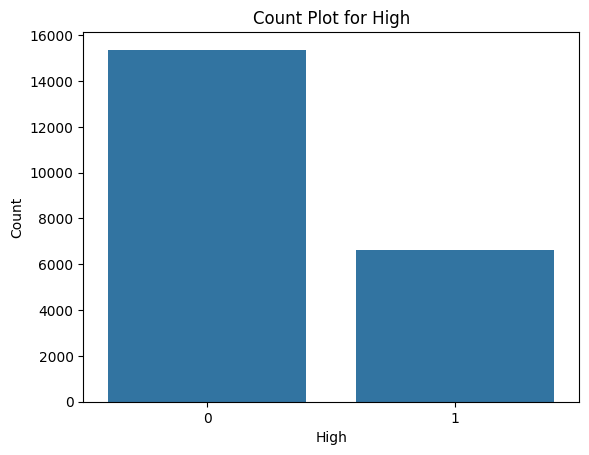

In [93]:
sns.countplot(x = 'High', data = ATM_sample)
plt.xlabel('High')
plt.ylabel('Count')
plt.title('Count Plot for High')

Text(0.5, 1.0, 'Count Plot for Weekday')

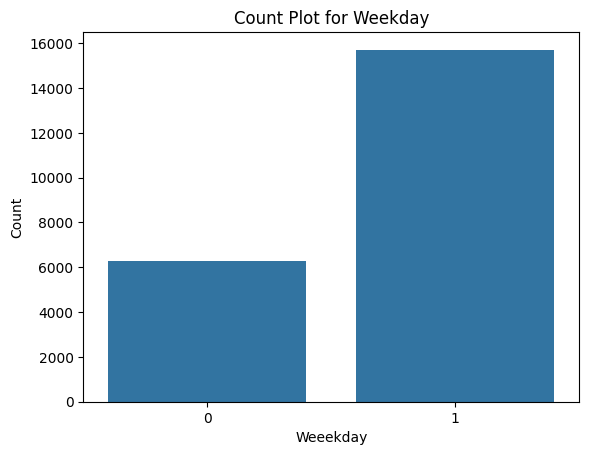

In [94]:
sns.countplot(x = 'Weekday', data = ATM_sample)
plt.xlabel('Weeekday')
plt.ylabel('Count')
plt.title('Count Plot for Weekday')

Text(0.5, 1.0, 'Count Plot for Center')

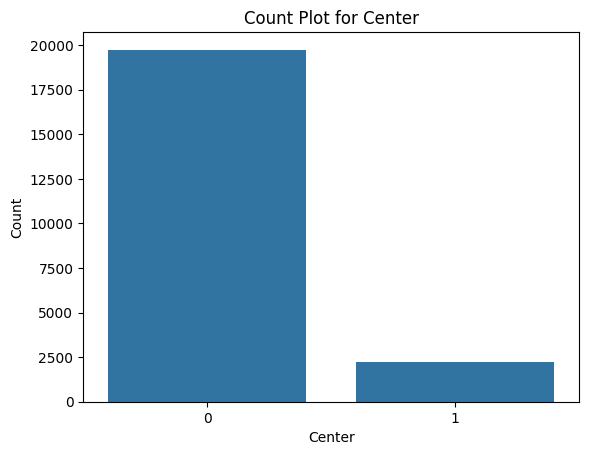

In [95]:
sns.countplot(x = 'Center', data = ATM_sample)
plt.xlabel('Center')
plt.ylabel('Count')
plt.title('Count Plot for Center')

Text(0.5, 1.0, 'Count Plot for Downtown')

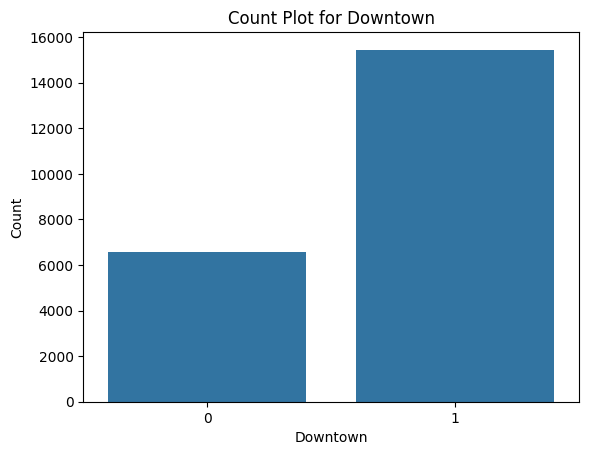

In [96]:
sns.countplot(x = 'Downtown', data = ATM_sample)
plt.xlabel('Downtown')
plt.ylabel('Count')
plt.title('Count Plot for Downtown')

In [97]:
# Lasso

In [98]:
import numpy as np
from sklearn.model_selection import train_test_split

# Random seed to produce reproducibility for the tests
np.random.seed(42)

train, test = train_test_split(ATM_sample, test_size = 0.3, random_state=42)

In [99]:
response = ['Withdraw']
numerical_predictors = ['Shops', 'ATMs']
predictors = [x for x in ATM_sample.columns if x not in response]
predictors

['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']

In [100]:
mu=train[numerical_predictors].mean() # mean for each feature
sigma=train[numerical_predictors].std() # std for each feature

In [101]:
mu.head()

Shops    7.282577
ATMs     7.913961
dtype: float64

In [102]:
sigma.head()

Shops    4.133346
ATMs     3.693190
dtype: float64

In [103]:
train[numerical_predictors] = (train[numerical_predictors] - mu) / sigma
test[numerical_predictors] = (test[numerical_predictors] - mu) / sigma

In [104]:
train[numerical_predictors].mean().head()

Shops    2.353096e-17
ATMs    -9.689219e-17
dtype: float64

In [105]:
train[numerical_predictors].std().head()

Shops    1.0
ATMs     1.0
dtype: float64

In [106]:
# The training and test datasets has been standardised

In [107]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42)

# Fitting the model
lasso_cv.fit(train[predictors], np.ravel(train[response]))
alpha_index = np.argmin(lasso_cv.mse_path_.mean(axis=1))
mse_folds = lasso_cv.mse_path_[alpha_index]

for i, mse in enumerate(mse_folds):
    print(f"Fold {i+1}: MSE = {mse}")

mse_average = np.mean(mse_folds)

print(f'Best LASSO alpha: {lasso_cv.alpha_}')
print(f"Average MSE: {mse_average}")

Fold 1: MSE = 7.317901429690378
Fold 2: MSE = 7.3744901411883035
Fold 3: MSE = 6.638951667323525
Fold 4: MSE = 6.743188903010974
Fold 5: MSE = 6.466966680597142
Best LASSO alpha: 0.024833199986628716
Average MSE: 6.908299764362065


In [108]:
from sklearn import linear_model
Lasso_reg = linear_model.Lasso(alpha = lasso_cv.alpha_  )
Lasso_reg.fit(train[predictors], np.ravel(train[response]))

pd.DataFrame(Lasso_reg.coef_.round(3), index = predictors).T

,Shops,ATMs,Downtown,Weekday,Center,High
0,28.056,-3.676,-0.0,-3.407,7.149,0.876


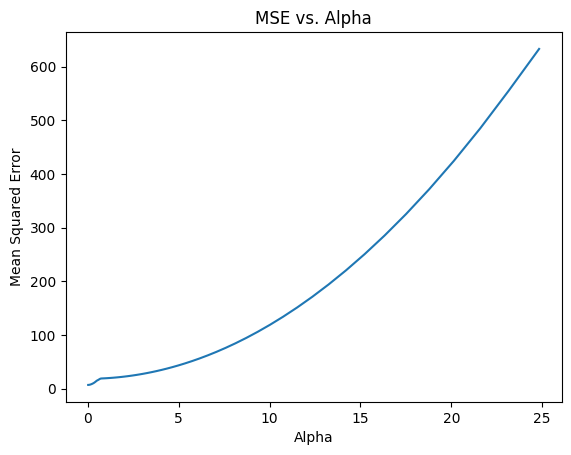

In [109]:
# Plotting MSE vs Alpha

mses = np.mean(lasso_cv.mse_path_, axis=1)
plt.plot(lasso_cv.alphas_, mses)
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Alpha')
plt.show()

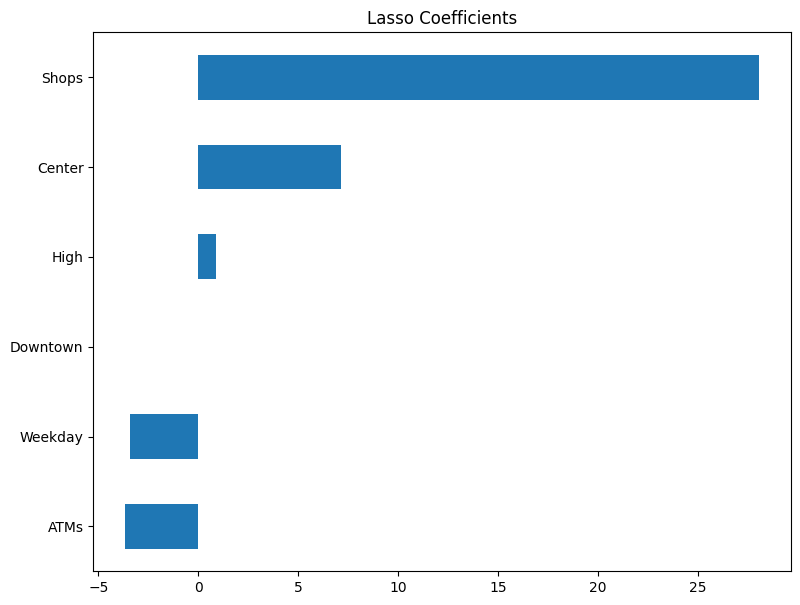

In [110]:
# Plotting the Lasso coefficients to see which predictor variables are zero

import matplotlib.pyplot as plt

coef = pd.Series(lasso_cv.coef_, index=predictors)
coef_sorted = coef.sort_values()
coef_sorted.plot(kind='barh', figsize=(9,7))
plt.title('Lasso Coefficients')
plt.show()

In [111]:
# Test MSE

from sklearn.metrics import mean_squared_error

y_pred = lasso_cv.predict(test[predictors])
mse = mean_squared_error(test[response], y_pred)
print(f' Test MSE: {mse}')

 Test MSE: 6.350207211991608


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d

ratio: 0.99
Fold 1: MSE = 7.580704140769687
Fold 2: MSE = 7.656888106901912
Fold 3: MSE = 6.785646898911671
Fold 4: MSE = 7.028197921196713
Fold 5: MSE = 6.593150880450389
Best Elastic Net Lambda: 0.10368102998455826
Average MSE across all folds: 7.128917589646075
test MSE: 6.410684815083155
l1 ratio: 0.99


Text(0.5, 1.0, 'l1 ratio vs MSE')

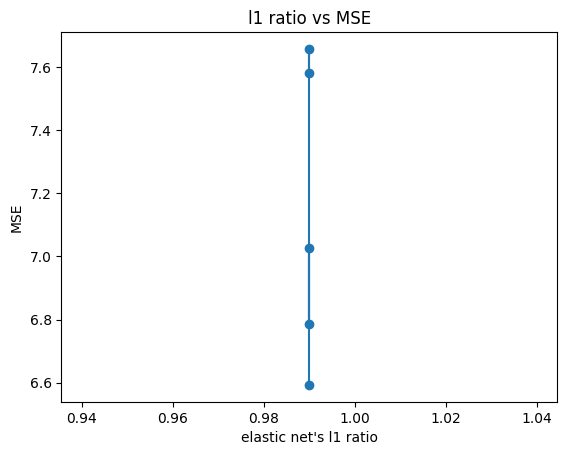

In [112]:
# Elastic Net
train, test = train_test_split(ATM_sample, test_size = 0.3, random_state=42)
enet_cv = ElasticNetCV(l1_ratio = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99], cv = 5)
enet_cv.fit(train[predictors], train[response])
cross_val_scores = -1 * cross_val_score(enet_cv, train[predictors], train[response], cv=5, scoring='neg_mean_squared_error')
average_mse = np.mean(cross_val_scores) # Average CV MSE
y_test_pred = enet_cv.predict(test[predictors])
test_mse = mean_squared_error(test[response], y_test_pred) # test MSE
print(f'ratio: {enet_cv.l1_ratio_}')
for i, mse in enumerate(cross_val_scores):
    print(f"Fold {i+1}: MSE = {mse}")

print(f'Best Elastic Net Lambda: {enet_cv.alpha_}')
print(f"Average MSE across all folds: {average_mse}")

print(f'test MSE: {test_mse}')
print(f'l1 ratio: {enet_cv.l1_ratio_}')

# plot the ratio graph
plt.plot(enet_cv.l1_ratio_* np.ones_like(cross_val_scores), cross_val_scores, marker='o')
plt.xlabel("elastic net's l1 ratio")
plt.ylabel("MSE")
plt.title("l1 ratio vs MSE")

In [113]:
enet = ElasticNet(alpha = enet_cv.alpha_, l1_ratio = enet_cv.l1_ratio_)
enet.fit(x_sample, y_sample)

ElasticNet(alpha=0.10368102998455826, l1_ratio=0.99)

n_neighbors=1, Average Cross-Validation MSE: 0.5894181486561725
n_neighbors=2, Average Cross-Validation MSE: 0.4758382390483188
n_neighbors=3, Average Cross-Validation MSE: 0.46868054792576935
n_neighbors=4, Average Cross-Validation MSE: 0.4684106845041768
n_neighbors=5, Average Cross-Validation MSE: 0.47600505979348223
n_neighbors=6, Average Cross-Validation MSE: 0.49085035450262654
n_neighbors=7, Average Cross-Validation MSE: 0.5026326726262079
n_neighbors=8, Average Cross-Validation MSE: 0.5298694124743062
n_neighbors=9, Average Cross-Validation MSE: 0.5566209010284091
n_neighbors=10, Average Cross-Validation MSE: 0.5755440325115746
n_neighbors=11, Average Cross-Validation MSE: 0.6105845933324446
n_neighbors=12, Average Cross-Validation MSE: 0.6466041431415886
n_neighbors=13, Average Cross-Validation MSE: 0.6894368706281122
n_neighbors=14, Average Cross-Validation MSE: 0.7265044613583089
n_neighbors=15, Average Cross-Validation MSE: 0.7739059232030618
n_neighbors=16, Average Cross-V

Text(0.5, 1.0, 'Average Cross-Validation MSE VS K Values')

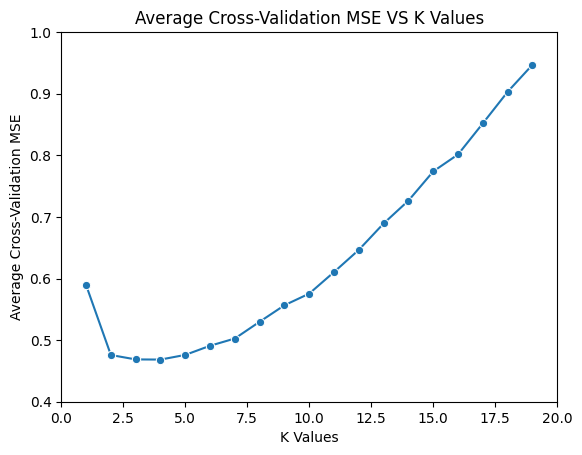

In [114]:
# KNN Average Cross Validation MSE
train, test = train_test_split(ATM_sample, test_size = 0.3, random_state=42)
n_neighbors_values = list(range(1, 20))

knn_scores = []

for n_neighbors in n_neighbors_values: # finding all avarage cross validation mse
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    mse_scores = -1 * cross_val_score(knn_regressor, x_sample, y_sample, cv=5, scoring='neg_mean_squared_error')
    knn_scores.append(np.mean(mse_scores))
    print(f"n_neighbors={n_neighbors}, Average Cross-Validation MSE: {np.mean(mse_scores)}")

best_n_neighbors = n_neighbors_values[np.argmin(knn_scores)] # optimal value
print(f"Best n_neighbors value: {best_n_neighbors}")

final_knn_regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors)
final_knn_regressor.fit(x_sample, y_sample)

y_pred = final_knn_regressor.predict(x_test)

test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

sns.lineplot(x = n_neighbors_values, y = knn_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Average Cross-Validation MSE")
plt.xlim(0,20)
plt.ylim(0.4,1)
plt.title("Average Cross-Validation MSE VS K Values")

n_neighbors=1, test MSE: 0.4688839291649772
n_neighbors=2, test MSE: 0.3584668128943567
n_neighbors=3, test MSE: 0.3123183482308317
n_neighbors=4, test MSE: 0.29954797010341194
n_neighbors=5, test MSE: 0.2865344861899663
n_neighbors=6, test MSE: 0.27683140138000006
n_neighbors=7, test MSE: 0.2708071932206997
n_neighbors=8, test MSE: 0.27520294942844054
n_neighbors=9, test MSE: 0.2707362981958605
n_neighbors=10, test MSE: 0.2756214570065731
n_neighbors=11, test MSE: 0.27684070779743086
n_neighbors=12, test MSE: 0.27608592786013036
n_neighbors=13, test MSE: 0.29038736219675104
n_neighbors=14, test MSE: 0.2870533005273923
n_neighbors=15, test MSE: 0.2990806127799497
n_neighbors=16, test MSE: 0.30632346045681014
n_neighbors=17, test MSE: 0.3156065602712296
n_neighbors=18, test MSE: 0.3114180618836566
n_neighbors=19, test MSE: 0.322673367055748
n_neighbors=20, test MSE: 0.32660919042003034
n_neighbors=21, test MSE: 0.32758821935467525
n_neighbors=22, test MSE: 0.3327412374969493
n_neighbors

Text(0.5, 1.0, 'Test MSE vs Number of Neighbors')

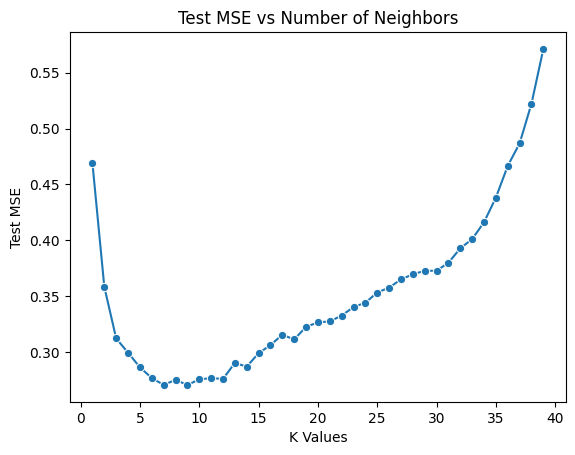

In [115]:
# Test MSE
k_values = [i for i in range (1,40)]
scores = []

for k in k_values: # finding test MSE of every K
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_sample, y_sample)
    y_test_pred = knn.predict(x_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    scores.append(test_mse)
    print(f"n_neighbors={k}, test MSE: {test_mse}")

print(f'minimum: {min(scores)} at {scores.index(min(scores)) + 1}')
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Test MSE")
plt.title("Test MSE vs Number of Neighbors")

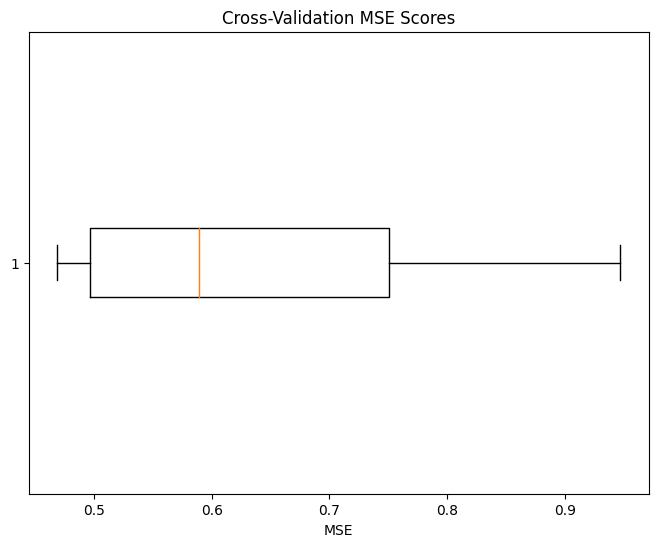

In [116]:
# KNN
# boxplotog Average CV MSE
plt.figure(figsize=(8, 6))
plt.boxplot(knn_scores, vert=False)
plt.title("Cross-Validation MSE Scores")
plt.xlabel("MSE")
plt.show()

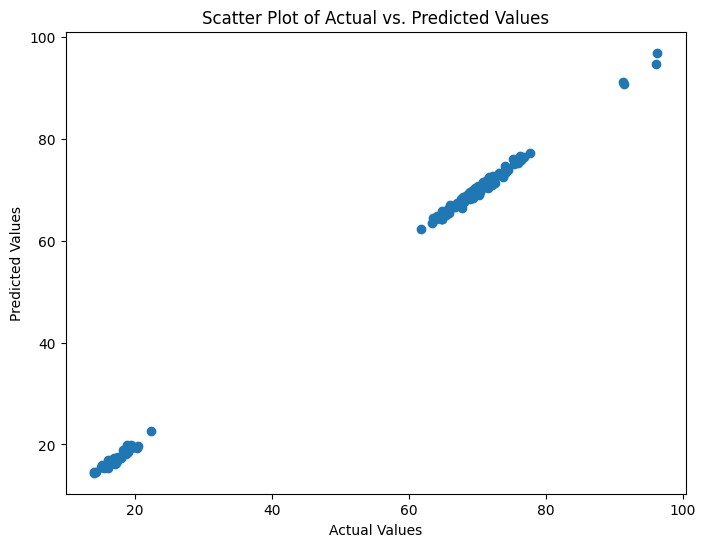

In [117]:
# scatter plot fot the actual value vs predict value of KNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()

In [118]:
#Ridge
df_sample = ATM_sample.copy()  # make a copy of the sample set
df_test = ATM_test.copy() # make a copy of the test set

In [119]:
#  creat X and y for the sample set
X = df_sample.drop(['Withdraw'], axis=1)
y = df_sample['Withdraw']

In [120]:
# use ridge cv to get a rough result of the best alpha
kf = KFold(n_splits=5, shuffle=True, random_state=1)
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), scoring='neg_mean_squared_error', cv=kf)
ridge_cv.fit(X, y)
print('The best alpha:', ridge_cv.alpha_  )

The best alpha: 0.01


In [121]:
# first round selection of the best alpha
alphas = np.logspace(-6, 6, 13)
lowest_mse = 10e10
best_alpha = -1
mses = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=kf)
    mse_scores = -mse_scores
    average_mse = np.mean(mse_scores)
    mses.append(average_mse)
    if average_mse < lowest_mse:
        lowest_mse = average_mse
        best_alpha = alpha
print(mses)

[6.2593190430037335, 6.259319041153614, 6.259319022764187, 6.259318850049794, 6.259318237346049, 6.2594200912287175, 6.268456383366649, 6.444825678306548, 6.712898900009259, 7.6082344915972175, 14.721304093104688, 58.75126847650157, 311.84705876422345]


The best alpha: 0.01
lowest mse 6.259318237346049


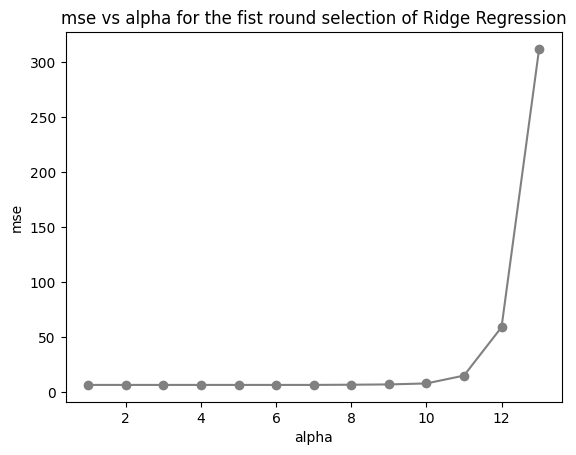

In [122]:
# print the selected alpha and the lowest mse
# draw the plot of mse vs alpha
print('The best alpha:',best_alpha )
print('lowest mse',lowest_mse)
fig, ax = plt.subplots()
ax.scatter(range(1,len(mses)+1), mses,color='grey')
ax.plot(range(1,len(mses)+1), mses,color='grey')
ax.set_title('mse vs alpha for the fist round selection of Ridge Regression')
ax.set_xlabel('alpha')
ax.set_ylabel('mse')
plt.show()

In [123]:
# second round selection of the best alpha
alphas = np.linspace(0,0.1,101)
lowest_mse = 10e10
best_alpha = -1
mses = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=kf)
    mse_scores = -mse_scores
    average_mse = np.mean(mse_scores)
    mses.append(average_mse)
    if average_mse < lowest_mse:
        lowest_mse = average_mse
        best_alpha = alpha

The best alpha: 0.008
lowest mse 6.259318198833769


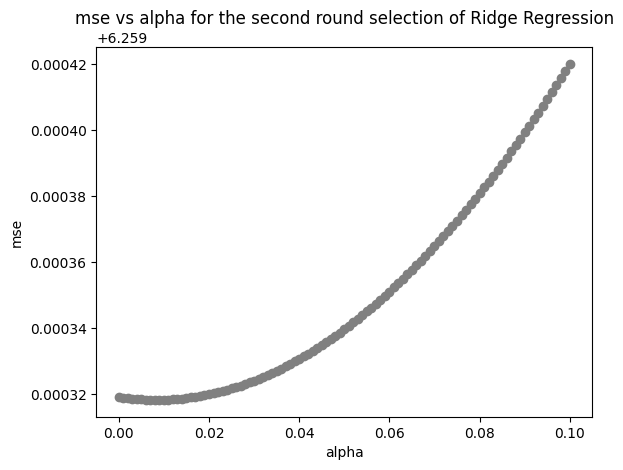

In [124]:
# print the selected alpha and the lowest mse
# draw the plot of mse vs alpha
print('The best alpha:',best_alpha )
print('lowest mse',lowest_mse)
fig, ax = plt.subplots()
ax.scatter(alphas, mses,c='grey')
ax.plot(alphas, mses,c='grey')
ax.set_title('mse vs alpha for the second round selection of Ridge Regression')
ax.set_xlabel('alpha')
ax.set_ylabel('mse')
plt.show()

In [125]:
# generate new features with poly nomial features
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [126]:
# For a new X combination, we need to find a new alpha
# first round selection of the best alpha
alphas = np.logspace(-6, 6, 13)
lowest_mse = 10e10
best_alpha = -1
mses = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    mse_scores = cross_val_score(ridge, X_poly, y, scoring='neg_mean_squared_error', cv=kf)
    mse_scores = -mse_scores
    average_mse = np.mean(mse_scores)
    mses.append(average_mse)
    if average_mse < lowest_mse:
        lowest_mse = average_mse
        best_alpha = alpha

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.05167e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.27618e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.29017e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.05735e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:21

The best alpha: 1.0
lowest mse 0.24859857425759097


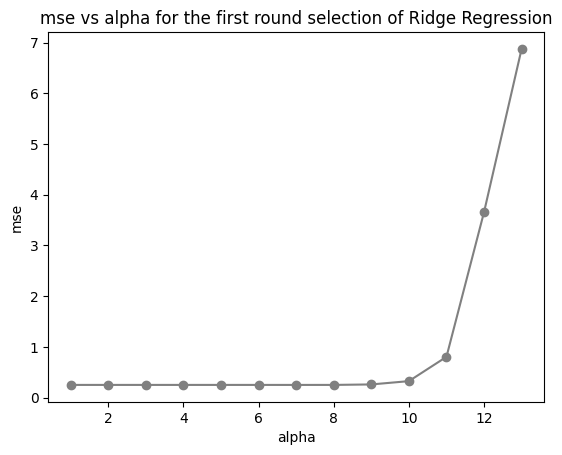

In [127]:
# print the selected alpha and the lowest mse
# draw the plot of mse vs alpha
print('The best alpha:',best_alpha )
print('lowest mse',lowest_mse)
fig, ax = plt.subplots()
ax.scatter(range(1,len(mses)+1), mses, c='grey')
ax.plot(range(1,len(mses)+1), mses,c='grey')
ax.set_title('mse vs alpha for the first round selection of Ridge Regression')
ax.set_xlabel('alpha')
ax.set_ylabel('mse')
plt.show()

In [128]:
# second round selection of the best alpha
# range of selection is around the selected best alpha in the first round
alphas = np.linspace(0,10.0,101)
lowest_mse = 10e10
best_alpha = -1
mses = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    mse_scores = cross_val_score(ridge, X_poly, y, scoring='neg_mean_squared_error', cv=kf)
    mse_scores = -mse_scores
    average_mse = np.mean(mse_scores)
    mses.append(average_mse)
    if average_mse < lowest_mse:
        lowest_mse = average_mse
        best_alpha = alpha

The best alpha: 2.6
lowest mse 0.2485681083854064


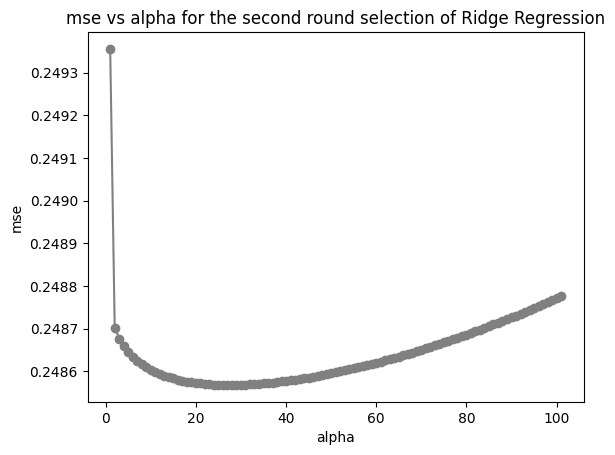

In [129]:
# print the selected alpha and the lowest mse
# draw the plot of mse vs alpha
print('The best alpha:',best_alpha )
print('lowest mse',lowest_mse)
fig, ax = plt.subplots()
ax.scatter(range(1,len(mses)+1), mses, c='grey')
ax.plot(range(1,len(mses)+1), mses,c='grey')
ax.set_title('mse vs alpha for the second round selection of Ridge Regression')
ax.set_xlabel('alpha')
ax.set_ylabel('mse')
plt.show()

In [130]:
# prepare for prediciton
# generate features for test sample
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_test_poly = poly_features.fit_transform(df_test.drop(['Withdraw'],axis=1))

In [131]:
# fit the model
# prediction and calculat the mean squared error
model = Ridge(alpha =best_alpha )
model.fit(X_poly,y)
test_pred = model.predict(X_test_poly)
mse =  mean_squared_error(test_pred, df_test['Withdraw'])

In [132]:
print('estimated mse on the test set:',mse)

estimated mse on the test set: 0.2384671399150856


In [133]:
#OLS
df_sample = ATM_sample.copy()  # make a copy of the sample set
df_test = ATM_test.copy() # make a copy of the test set

In [134]:
#  creat X and y for the sample set
X = df_sample[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']]
y = df_sample['Withdraw']

In [135]:
# do k fold cross validation
X = sm.add_constant(X) # include constant in linear regression model
kf = KFold(n_splits=5, shuffle=True, random_state=0) # choose to shuffle the data before splitting
mses = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit()
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

In [136]:
# the result of k fold cross validation
print( pd.DataFrame(mses).describe()  )
print(mses)

              0
count  5.000000
mean   6.262824
std    0.376480
min    5.738219
25%    5.986377
50%    6.509039
75%    6.520606
max    6.559881
[6.520605824587141, 5.7382186339033066, 6.55988059699702, 6.509039345350738, 5.986376806970952]


In [137]:
# fit the model and print the summary
model = sm.OLS(y, X)
model = model.fit( )
print( model.summary())

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.656e+05
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:54:41   Log-Likelihood:                -51380.
No. Observations:               22000   AIC:                         1.028e+05
Df Residuals:                   21993   BIC:                         1.028e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4284      0.111     94.198      0.0

In [138]:
# prepare for prediciton
# include the constant when prediciton
# calculate the overall mean squared error
test_X = df_test[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']]
test_X = sm.add_constant(test_X)
test_pred = model.predict(test_X )
mse_test = mean_squared_error(df_test['Withdraw'], test_pred)
print(mse_test)

7.405884449855998


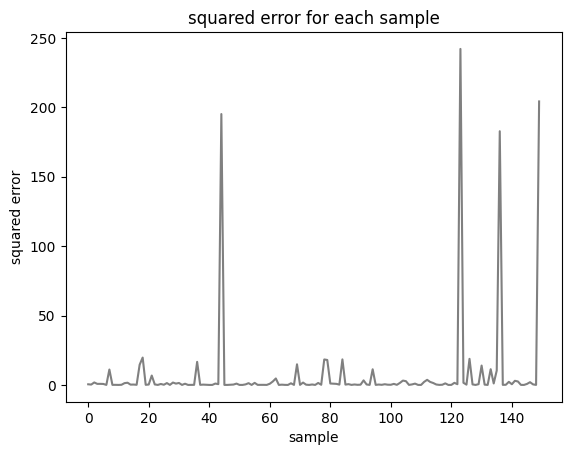

In [139]:
# calculate the squared error for each sample
# print the plot of squared error
squared_error = pd.DataFrame( (df_test['Withdraw']- test_pred) **2,columns=['squared_error'] )
plt.plot(squared_error['squared_error'],color='grey')
plt.xlabel('sample')
plt.ylabel('squared error')
plt.title('squared error for each sample')
plt.show()

In [140]:
# sort the squared error in ascending order
squared_error = pd.DataFrame( (df_test['Withdraw']- test_pred) **2,columns=['squared_error'] )
squared_error.sort_values(by='squared_error',inplace=True,ignore_index=True)

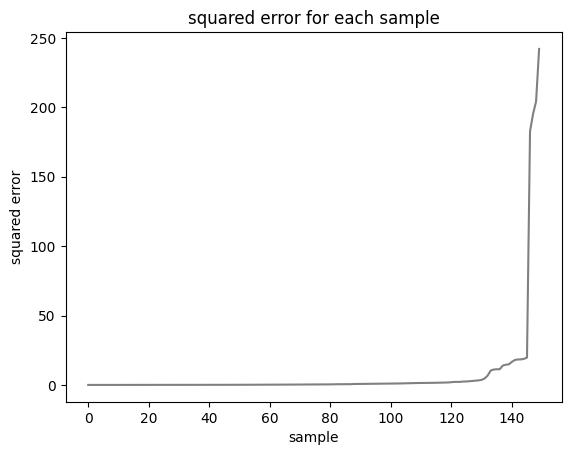

In [141]:
# print the plot of squared error
plt.plot(squared_error['squared_error'],color='grey')
plt.xlabel('sample')
plt.ylabel('squared error')
plt.title('squared error for each sample')
plt.show()

In [142]:
# print the mean squared error excluding the 10 samples with the largest squared error
# print the mean squared error excluding the 20 samples with the largest squared error
print(squared_error[1:140].mean() )
print(squared_error[1:130].mean() )

squared_error    1.273848
dtype: float64
squared_error    0.578326
dtype: float64


Neural Network

In [143]:
predictors_not_scaled = ATM_sample.drop(['Withdraw'],axis=1)
target_not_scaled = ATM_sample['Withdraw']
scaler = StandardScaler()

scale = scaler.fit(predictors_not_scaled)
X1 = scale.transform(predictors_not_scaled)

In [144]:
np.random.seed(42)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [145]:
def create_NN1():
    NN1 = Sequential()
    NN1.add(Dense(14,input_dim = predictors_not_scaled.shape[1], activation='relu'))
    NN1.add(Dense(6, input_dim = 14, activation='relu'))
    NN1.add(Dense(1))
    NN1.compile(loss='mean_squared_error', optimizer='adam')
    return NN1

def create_NN2():
    model = Sequential()
    model.add(Dense(20, input_dim = predictors_not_scaled.shape[1], activation='relu'))
    model.add(Dense(10, input_dim = 20, activation='relu'))
    model.add(Dense(6, input_dim = 10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def create_NN3():
    model = Sequential()
    model.add(Dense(10, input_dim = predictors_not_scaled.shape[1], activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [154]:
# model 1
scores_test = []
scores_train = []

for train_index, test_index in kf.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = target_not_scaled[train_index], target_not_scaled[test_index]

    model = create_NN1()
    model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1)

    predict = model.predict(X_train)
    mse = mean_squared_error(y_train, predict)
    scores_train.append(mse)

    predict1 = model.predict(X_test)
    mse1 = mean_squared_error(y_test, predict1)
    scores_test.append(mse1)

for i, mse in enumerate(scores_train):
    print(f'Fold {i + 1}: Train MSE = {mse:.4f}')
    print(f'Fold {i + 1}: Test MSE = {scores_test[i]:.4f}')
print(f'Average Train MSE: {np.mean(scores_train):.4f}')
print(f'Average Test MSE: {np.mean(scores_test):.4f}')

Epoch 1/100
880/880 [==============================] - 0s 298us/step - loss: 1367.8741
Epoch 2/100
880/880 [==============================] - 0s 292us/step - loss: 15.1273
Epoch 3/100
880/880 [==============================] - 0s 489us/step - loss: 3.9501
Epoch 4/100
880/880 [==============================] - 0s 291us/step - loss: 1.9788
Epoch 5/100
880/880 [==============================] - 0s 292us/step - loss: 1.2092
Epoch 6/100
880/880 [==============================] - 0s 289us/step - loss: 0.8595
Epoch 7/100
880/880 [==============================] - 0s 295us/step - loss: 0.6837
Epoch 8/100
880/880 [==============================] - 0s 318us/step - loss: 0.5717
Epoch 9/100
880/880 [==============================] - 0s 362us/step - loss: 0.4855
Epoch 10/100
880/880 [==============================] - 0s 290us/step - loss: 0.4121
Epoch 11/100
880/880 [==============================] - 0s 286us/step - loss: 0.3635
Epoch 12/100
880/880 [==============================] - 0s 290us/step 

In [147]:
# model 2
scores_test = []
scores_train = []

for train_index, test_index in kf.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = target_not_scaled[train_index], target_not_scaled[test_index]

    model = create_NN2()
    model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1)

    predict = model.predict(X_train)
    mse = mean_squared_error(y_train, predict)
    scores_train.append(mse)

    predict1 = model.predict(X_test)
    mse1 = mean_squared_error(y_test, predict1)
    scores_test.append(mse1)

for i, mse in enumerate(scores_train):
    print(f'Fold {i + 1}: Train MSE = {mse:.4f}')
    print(f'Fold {i + 1}: Test MSE = {scores_test[i]:.4f}')
print(f'Average Train MSE: {np.mean(scores_train):.4f}')
print(f'Average Test MSE: {np.mean(scores_test):.4f}')

Epoch 1/100
880/880 [==============================] - 0s 323us/step - loss: 874.3351
Epoch 2/100
880/880 [==============================] - 0s 322us/step - loss: 4.1490
Epoch 3/100
880/880 [==============================] - 0s 320us/step - loss: 1.7357
Epoch 4/100
880/880 [==============================] - 0s 313us/step - loss: 0.8837
Epoch 5/100
880/880 [==============================] - 0s 313us/step - loss: 0.6460
Epoch 6/100
880/880 [==============================] - 0s 314us/step - loss: 0.5126
Epoch 7/100
880/880 [==============================] - 0s 315us/step - loss: 0.4318
Epoch 8/100
880/880 [==============================] - 0s 314us/step - loss: 0.3817
Epoch 9/100
880/880 [==============================] - 0s 313us/step - loss: 0.3648
Epoch 10/100
880/880 [==============================] - 0s 311us/step - loss: 0.3519
Epoch 11/100
880/880 [==============================] - 0s 313us/step - loss: 0.3491
Epoch 12/100
880/880 [==============================] - 0s 312us/step - 

In [148]:
# model 3
scores_test = []
scores_train = []

for train_index, test_index in kf.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = target_not_scaled[train_index], target_not_scaled[test_index]

    model = create_NN3()
    model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1)

    predict = model.predict(X_train)
    mse = mean_squared_error(y_train, predict)
    scores_train.append(mse)

    predict1 = model.predict(X_test)
    mse1 = mean_squared_error(y_test, predict1)
    scores_test.append(mse1)

for i, mse in enumerate(scores_train):
    print(f'Fold {i + 1}: Train MSE = {mse:.4f}')
    print(f'Fold {i + 1}: Test MSE = {scores_test[i]:.4f}')
print(f'Average Train MSE: {np.mean(scores_train):.4f}')
print(f'Average Test MSE: {np.mean(scores_test):.4f}')

Epoch 1/100
880/880 [==============================] - 1s 831us/step - loss: 2678.4331
Epoch 2/100
880/880 [==============================] - 1s 897us/step - loss: 492.7943
Epoch 3/100
880/880 [==============================] - 0s 468us/step - loss: 72.2178
Epoch 4/100
880/880 [==============================] - 1s 684us/step - loss: 18.9001
Epoch 5/100
880/880 [==============================] - 0s 289us/step - loss: 7.0556
Epoch 6/100
880/880 [==============================] - 0s 356us/step - loss: 5.0204
Epoch 7/100
880/880 [==============================] - 1s 650us/step - loss: 3.5784
Epoch 8/100
880/880 [==============================] - 0s 346us/step - loss: 2.3310
Epoch 9/100
880/880 [==============================] - 0s 278us/step - loss: 1.5077
Epoch 10/100
880/880 [==============================] - 0s 288us/step - loss: 1.0754
Epoch 11/100
880/880 [==============================] - 0s 276us/step - loss: 0.8527
Epoch 12/100
880/880 [==============================] - 0s 273us/st

Test.csv test for the 3 NN models

In [149]:
NN = create_NN1()
NN.fit(X1, target_not_scaled, epochs=100, batch_size=20 , verbose=1)

x_test = ATM_test.drop(['Withdraw'],axis=1)
y_test = ATM_test['Withdraw']
x_test = scaler.transform(x_test)
predict = NN.predict(x_test)
test_error = (mean_squared_error(y_test, predict))
print('Test Data MSE original scale: {0:.4f}'.format(test_error))

Epoch 1/100
1100/1100 [==============================] - 1s 561us/step - loss: 982.9136
Epoch 2/100
1100/1100 [==============================] - 0s 289us/step - loss: 5.1500
Epoch 3/100
1100/1100 [==============================] - 0s 352us/step - loss: 1.5434
Epoch 4/100
1100/1100 [==============================] - 0s 307us/step - loss: 1.0467
Epoch 5/100
1100/1100 [==============================] - 0s 289us/step - loss: 0.8150
Epoch 6/100
1100/1100 [==============================] - 0s 291us/step - loss: 0.6344
Epoch 7/100
1100/1100 [==============================] - 1s 490us/step - loss: 0.5007
Epoch 8/100
1100/1100 [==============================] - 0s 296us/step - loss: 0.4098
Epoch 9/100
1100/1100 [==============================] - 1s 460us/step - loss: 0.3485
Epoch 10/100
1100/1100 [==============================] - 0s 301us/step - loss: 0.3164
Epoch 11/100
1100/1100 [==============================] - 0s 334us/step - loss: 0.3037
Epoch 12/100
1100/1100 [==========================

In [150]:
NN = create_NN2()
NN.fit(X1, target_not_scaled, epochs=100, batch_size=20 , verbose=1)

x_test = ATM_test.drop(['Withdraw'],axis=1)
y_test = ATM_test['Withdraw']
x_test = scaler.transform(x_test)
predict = NN.predict(x_test)
test_error = (mean_squared_error(y_test, predict))
print('Test Data MSE original scale: {0:.4f}'.format(test_error))

Epoch 1/100
1100/1100 [==============================] - 0s 315us/step - loss: 559.6891
Epoch 2/100
1100/1100 [==============================] - 0s 306us/step - loss: 2.3269
Epoch 3/100
1100/1100 [==============================] - 0s 314us/step - loss: 1.1350
Epoch 4/100
1100/1100 [==============================] - 0s 316us/step - loss: 0.7336
Epoch 5/100
1100/1100 [==============================] - 0s 314us/step - loss: 0.5085
Epoch 6/100
1100/1100 [==============================] - 0s 308us/step - loss: 0.3976
Epoch 7/100
1100/1100 [==============================] - 0s 314us/step - loss: 0.3578
Epoch 8/100
1100/1100 [==============================] - 0s 319us/step - loss: 0.3427
Epoch 9/100
1100/1100 [==============================] - 0s 319us/step - loss: 0.3475
Epoch 10/100
1100/1100 [==============================] - 0s 315us/step - loss: 0.3407
Epoch 11/100
1100/1100 [==============================] - 0s 311us/step - loss: 0.3388
Epoch 12/100
1100/1100 [==========================

In [159]:
NN = create_NN3()
NN.fit(X1, target_not_scaled, epochs=100, batch_size=20 , verbose=1)

x_test = ATM_test.drop(['Withdraw'],axis=1)
y_test = ATM_test['Withdraw']
x_test = scaler.transform(x_test)
predict = NN.predict(x_test)
test_error = (mean_squared_error(y_test, predict))
print('Test Data MSE original scale: {0:.4f}'.format(test_error))

Epoch 1/100
1100/1100 [==============================] - 0s 288us/step - loss: 2481.5537
Epoch 2/100
1100/1100 [==============================] - 0s 289us/step - loss: 211.5517
Epoch 3/100
1100/1100 [==============================] - 0s 279us/step - loss: 28.7631
Epoch 4/100
1100/1100 [==============================] - 0s 279us/step - loss: 9.6279
Epoch 5/100
1100/1100 [==============================] - 0s 279us/step - loss: 6.9412
Epoch 6/100
1100/1100 [==============================] - 0s 279us/step - loss: 5.2357
Epoch 7/100
1100/1100 [==============================] - 0s 279us/step - loss: 3.2058
Epoch 8/100
1100/1100 [==============================] - 0s 280us/step - loss: 1.7264
Epoch 9/100
1100/1100 [==============================] - 0s 280us/step - loss: 1.0267
Epoch 10/100
1100/1100 [==============================] - 0s 277us/step - loss: 0.7409
Epoch 11/100
1100/1100 [==============================] - 0s 278us/step - loss: 0.6003
Epoch 12/100
1100/1100 [======================

In [152]:
# summary of the models
NN1 = create_NN1()
NN1.summary()

NN2 = create_NN2()
NN2.summary()

NN3 = create_NN3()
NN3.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 14)                98        
                                                                 
 dense_118 (Dense)           (None, 6)                 90        
                                                                 
 dense_119 (Dense)           (None, 1)                 7         
                                                                 
Total params: 195 (780.00 Byte)
Trainable params: 195 (780.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 20)                140       
                                                          